# Genel Bilgiler
Perakende Satis Hacim Endeksi ve Degisim Oranlari (sabit fiyatlarla) (2015=100)
TÜİK'ten alınmıştır. https://data.tuik.gov.tr/Bulten/Index?p=Perakende-Satis-Endeksleri-Kasim-2022-49615#:~:text=T%C3%9C%C4%B0K%20Kurumsal&text=Sabit%20fiyatlarla%20perakende%20sat%C4%B1%C5%9F%20hacmi,ise%20%253%2C9%20artt%C4%B1.

Ayrıca TÜİK Ciro endeksi de yayınlamaktadır.

2015 Yılındaki hacim = 100 kabul edilerek Türkiye'deki farklı sektörlerdeki satış hacimlerini göstermektedir.

Bu sektörler ;

1. Perakende ticaret

2. Gıda, içecek ve tütün

3. Gıda dışı (otomotiv yakıtı hariç)

4. Bilgisayar, bilgisayar donanım ve yazılımları, kitap, iletişim aygıtları vb.

5. Ses ve görüntü cihazları, hırdavat, boya ve cam, elektrikli ev aletleri, mobilya vb.

6. Tekstil, giyim ve ayakkabı

7. Eczacılık ürünleri,  tıbbi ve ortopedik ürünler, kozmetik ve kişisel bakım malzemeleri

8. Posta yoluyla veya internet üzerinden

9. Otomotiv yakıtı

# Hedefler

Sektörlerin gelecekteki satış hacimlerinin tahmin edilerek, başta kobiler olmak üzere şirketlerin bulundakları sektörlerin gelecekteki satış hacimlerine bakarak aksiyon alabilmelerini sağlamak.

Birbirlerini pozitif/negatif etkileyen sektörler var mı? Varsa gelecek öngörülerek bir erken uyarı sistemi oluşturulabilir mi?

TÜİK sezonsallıktan arındırılmış ve arındırılmamış veri sunuyor. ARIMA , SARIMA ve SARIMAX gibi modellerin test edilerek hangisinin en iyi sonucu verdiğinin test edilmesi.

# Model Eğitimi

Literatür taramasında farklı tekniklerle farklı modellerin kullanıldığı görülmüştür. Bu nedenle  ARIMA , SARIMA , SARIMAX modellerinden başlanarak XGBoost, SVR modelleri eğitilecektir.

Bu bir örnek olduğu için sadece SARIMA modeli eğitilecektir.

> Rolling Origin Forecasting

SARIMA modelinin bir sonraki ayı tahmin etmesi sağlanarak her tahmin ettiği ayı eğitimde kullanarak yeni bir model eğitilecek ve her aydan sonra o ayı da eğitiminde kullanan yeni bir SARIMA modeliyle süreç devam ettirilecektir.
# Değerlendirme

Henüz karar verilmedi. Literatürde MAPE, MAE, MSE gibi farklı sebeplerle farklı değerlendirme metrikleri kullanılmış.


# Standart Imports

In [ ]:
!pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta

## Veri Önİşleme

In [ ]:
# Import data
df = pd.read_csv("/content/drive/MyDrive/makale-data/makale-data.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
Yıl\nYear,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,...,2022,2022,2022,2022,2022,2023,2023,2023,2023,2023
Ay\nMonth,1,2,3,4,5,6,7,8,9,10,...,8,9,10,11,12,1,2,3,4,5
Perakende TicaretArındırılmamış\nUnadjusted Endeks\n,"57,4","57,3","67,9","67,0","70,3","73,4","75,9","74,8","76,2","76,3",...,"157,5","162,1","159,0","162,4","188,4","146,5","135,3","169,2","165,8","178,1"
(Perakende Ticaret)Takvim etkilerinden \narındırılmış\nEndeks\n,"57,7","57,2","67,0","66,5","70,6","72,6","75,1","75,0","78,4","76,8",...,"156,2","160,7","159,4","160,9","186,5","145,3","134,9","167,2","169,7","176,7"
(Perakende Ticaret)Yıllık değişim\n\n (%),-,-,-,-,-,-,-,-,-,-,...,"9,8","10,2","11,6","11,7","21,4","34,1","21,9","28,9","27,6","28,4"
(Perakende Ticaret)Mevsim ve takvim \netkilerinden arındırılmış\n Endeks\n,"67,6","68,2","69,5","70,2","70,6","70,5","71,9","72,8","74,0","73,9",...,"149,9","151,6","154,6","156,5","162,3","171,7","161,3","172,5","174,3","178,0"
(Perakende Ticaret)Aylık değişim\n\n (%),-,"0,9","2,0","0,9","0,6","-0,1","2,0","1,1","1,7","-0,2",...,"5,7","1,1","2,0","1,2","3,7","5,8","-6,1","7,0","1,0","2,1"
Unnamed: 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Gıda, içecek ve tütünArındırılmamış\n\nIndex","68,9","66,1","76,1","74,0","78,5","81,6","85,0","86,6","84,7","80,4",...,"148,6","149,6","146,8","142,8","172,4","140,2","135,4","158,8","150,9","160,9"
"Gıda, içecek ve tütünTakvim etkilerinden \narındırılmış\n\nIndex","69,3","66,0","75,4","73,6","78,7","81,0","84,6","86,6","86,1","80,9",...,"147,8","148,9","146,4","142,1","171,4","139,8","135,1","158,0","153,3","160,1"


In [ ]:
# Perakende Ticaret sektörüne göz atalım.
pt = df.iloc[:, 0:7]
pt

,Yıl\nYear,Ay\nMonth,Perakende TicaretArındırılmamış\nUnadjusted Endeks\n,(Perakende Ticaret)Takvim etkilerinden \narındırılmış\nEndeks\n,(Perakende Ticaret)Yıllık değişim\n\n (%),(Perakende Ticaret)Mevsim ve takvim \netkilerinden arındırılmış\n Endeks\n,(Perakende Ticaret)Aylık değişim\n\n (%)
0,2010,1,"57,4","57,7",-,"67,6",-
1,2010,2,"57,3","57,2",-,"68,2","0,9"
2,2010,3,"67,9","67,0",-,"69,5","2,0"
3,2010,4,"67,0","66,5",-,"70,2","0,9"
4,2010,5,"70,3","70,6",-,"70,6","0,6"
...,...,...,...,...,...,...,...
156,2023,1,"146,5","145,3","34,1","171,7","5,8"
157,2023,2,"135,3","134,9","21,9","161,3","-6,1"
158,2023,3,"169,2","167,2","28,9","172,5","7,0"
159,2023,4,"165,8","169,7","27,6","174,3","1,0"


In [ ]:
# NaN value var mı kontrol edelim
pt.isna().sum()


Yıl\nYear                                                                      0
Ay\nMonth                                                                      0
Perakende TicaretArındırılmamış\nUnadjusted Endeks\n                           0
(Perakende Ticaret)Takvim etkilerinden \narındırılmış\nEndeks\n                0
(Perakende Ticaret)Yıllık değişim\n\n (%)                                      0
(Perakende Ticaret)Mevsim ve takvim \netkilerinden arındırılmış\n  Endeks\n    0
(Perakende Ticaret)Aylık değişim\n\n (%)                                       0
dtype: int64

In [ ]:
# Yıl ve ayları birleştirerek datetime sütunu oluşturan fonksiyon

def create_datetime_column(years, months):
    # Tüm ayların gün sayılarını belirlemek için bir örnek gün oluşturuyoruz.
    sample_day = 1

    all_datetime_values = []
    for year in years:
        # Verilen yıl ve ayları kullanarak bir tarih dizisi oluşturuyoruz.
        date_strings = [f"{year}-{month:02d}-{sample_day:02d}" for month in months]

        # Tarih dizisini datetime formatına çeviriyoruz.
        datetime_values = pd.to_datetime(date_strings)

        # Oluşturulan datetime değerlerini toplu bir liste içine ekliyoruz.
        all_datetime_values.extend(datetime_values)

    # Toplu datetime değerlerini kullanarak Pandas DataFrame oluşturuyoruz.
    df = pd.DataFrame({'datetime': all_datetime_values})

    return df


In [ ]:
date_time_df = create_datetime_column([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023],[1,2,3,4,5,6,7,8,9,10,11,12])
date_time_df


,datetime
0,2010-01-01
1,2010-02-01
2,2010-03-01
3,2010-04-01
4,2010-05-01
...,...
163,2023-08-01
164,2023-09-01
165,2023-10-01
166,2023-11-01


In [ ]:
# Verimiz 2023 5.aya kadar kalan ayları silelim.
date_time_df = date_time_df.drop([161,162,163,164,165,166,167])
date_time_df

,datetime
0,2010-01-01
1,2010-02-01
2,2010-03-01
3,2010-04-01
4,2010-05-01
...,...
156,2023-01-01
157,2023-02-01
158,2023-03-01
159,2023-04-01


In [ ]:
# Yeni datetime sütunumuzu verimizle birleştirelim
pt = pd.concat([date_time_df, pt], axis=1)
pt

,datetime,Yıl\nYear,Ay\nMonth,Perakende TicaretArındırılmamış\nUnadjusted Endeks\n,(Perakende Ticaret)Takvim etkilerinden \narındırılmış\nEndeks\n,(Perakende Ticaret)Yıllık değişim\n\n (%),(Perakende Ticaret)Mevsim ve takvim \netkilerinden arındırılmış\n Endeks\n,(Perakende Ticaret)Aylık değişim\n\n (%)
0,2010-01-01,2010,1,"57,4","57,7",-,"67,6",-
1,2010-02-01,2010,2,"57,3","57,2",-,"68,2","0,9"
2,2010-03-01,2010,3,"67,9","67,0",-,"69,5","2,0"
3,2010-04-01,2010,4,"67,0","66,5",-,"70,2","0,9"
4,2010-05-01,2010,5,"70,3","70,6",-,"70,6","0,6"
...,...,...,...,...,...,...,...,...
156,2023-01-01,2023,1,"146,5","145,3","34,1","171,7","5,8"
157,2023-02-01,2023,2,"135,3","134,9","21,9","161,3","-6,1"
158,2023-03-01,2023,3,"169,2","167,2","28,9","172,5","7,0"
159,2023-04-01,2023,4,"165,8","169,7","27,6","174,3","1,0"


In [ ]:
pt.iloc[:, 3:4].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 1 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Perakende TicaretArındırılmamış
Unadjusted Endeks
  161 non-null    object
dtypes: object(1)
memory usage: 1.4+ KB


In [ ]:
# String değerleri float'a dönüştürme
pt["Perakende TicaretArındırılmamış\nUnadjusted Endeks\n"] = pt['Perakende TicaretArındırılmamış\nUnadjusted Endeks\n'].str.replace(',', '.').astype(float)

In [ ]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column                                                                    Non-Null Count  Dtype         
---  ------                                                                    --------------  -----         
 0   datetime                                                                  161 non-null    datetime64[ns]
 1   Yıl
Year                                                                  161 non-null    int64         
 2   Ay
Month                                                                  161 non-null    int64         
 3   Perakende TicaretArındırılmamış
Unadjusted Endeks
                        161 non-null    float64       
 4   (Perakende Ticaret)Takvim etkilerinden 
arındırılmış
Endeks
              161 non-null    object        
 5   (Perakende Ticaret)Yıllık değişim

 (%)                                   161 non-null    object        
 6   (Perakende 

In [ ]:
# Indexi datetime olarak alalım
pt_arindirilmamis = pt.iloc[:, [0,3]]
pt_arindirilmamis = pt_arindirilmamis.set_index(['datetime'])
pt_arindirilmamis.rename(columns = {'Perakende TicaretArındırılmamış\nUnadjusted Endeks\n':'Endeks'}, inplace = True)
pt_arindirilmamis

,Endeks
datetime,
2010-01-01,57.4
2010-02-01,57.3
2010-03-01,67.9
2010-04-01,67.0
2010-05-01,70.3
...,...
2023-01-01,146.5
2023-02-01,135.3
2023-03-01,169.2


## Veriyi İnceleme & Görselleştirme


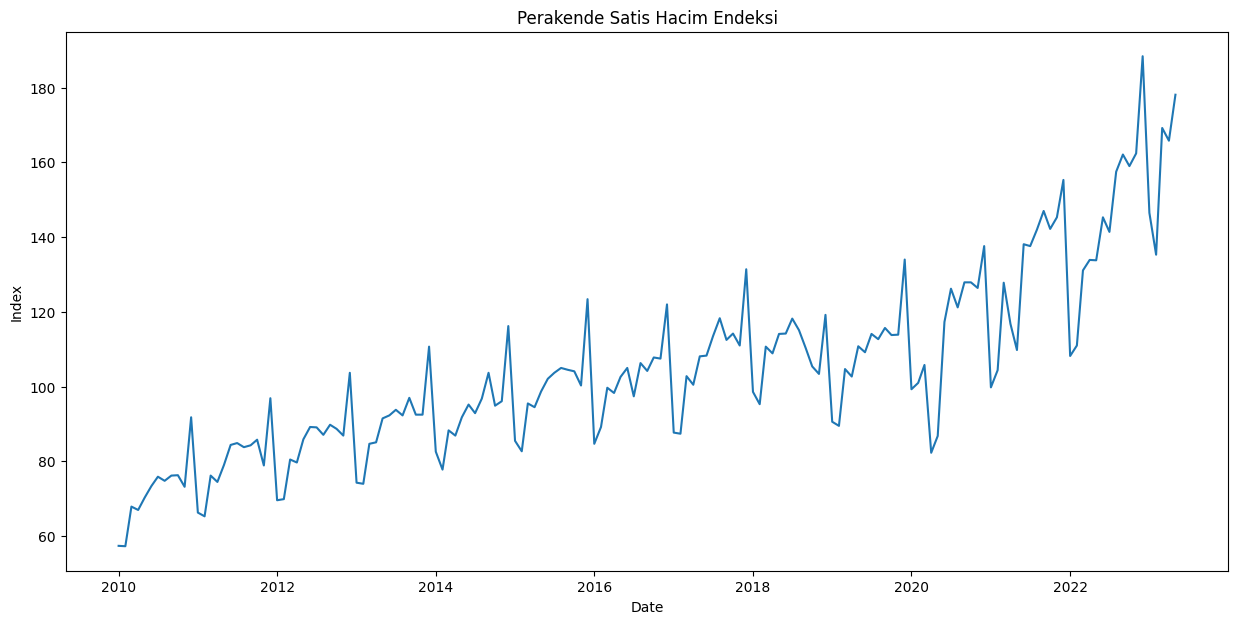

In [ ]:

# Endeksi görselleştirme
plt.figure(figsize=(15,7))
plt.title("Perakende Satis Hacim Endeksi")
plt.xlabel('Date')
plt.ylabel('Index')
plt.plot(pt_arindirilmamis)
plt.show()

In [ ]:
pt_arindirilmamis.iloc[:,[0]]

,Perakende TicaretArındırılmamış\nUnadjusted Endeks\n
datetime,
2010-01-01,57.4
2010-02-01,57.3
2010-03-01,67.9
2010-04-01,67.0
2010-05-01,70.3
...,...
2023-01-01,146.5
2023-02-01,135.3
2023-03-01,169.2


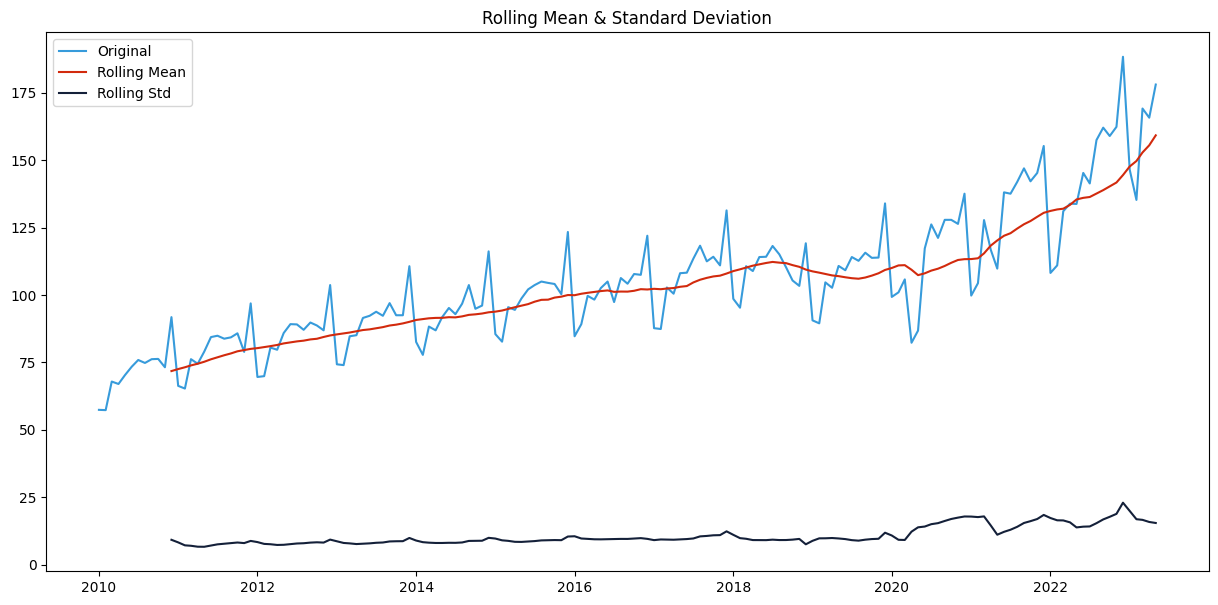

In [ ]:

#Determine rolling statistics
pt_arindirilmamis["rolling_avg"] = pt_arindirilmamis["Endeks"].rolling(window=12).mean() #window 12 ayı temsil ediyor.
pt_arindirilmamis["rolling_std"] = pt_arindirilmamis["Endeks"].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(pt_arindirilmamis["Endeks"], color='#379BDB', label='Original')
plt.plot(pt_arindirilmamis["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(pt_arindirilmamis["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(pt_arindirilmamis["Endeks"], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   2.359893
p-value                          0.998990
#Lags Used                      12.000000
Number of Observations Used    148.000000
Critical Value (1%)             -3.475325
Critical Value (5%)             -2.881275
Critical Value (10%)            -2.577293
dtype: float64


ADF testleri, test istatistiği, p değeri ve kritik değeri% 1,% 5 ve% 10 güven aralıklarında verir.

Eğer test istatistiği <kritik değer

o zaman boş hipotezi reddedebiliriz.(H0:Mevsimsellik etkisi var)

Eğer test istatistiği> kritik değer

o zaman boş hipotezi reddedemeyiz (bu, dizinin durağan olmadığı anlamına gelir).

Durağan Test sonucuna göre p değeri 0.05'ten (p> 0.05) büyük olduğu için H0 reddedilemez (yani kabul), verinin birim kökü vardır ve seri durağan değildir (aynı zamanda, test istatistiği kritik değerden büyüktür).



In [ ]:
# 2022 6.aya kadar eğitim için kullanılacaktır.
# Son yıllardaki yukarı yönlü büyük hareketlerden dolayı train set büyük tutuldu.
train = pt_arindirilmamis[:150]
train

,Endeks,rolling_avg,rolling_std
datetime,,,
2010-01-01,57.4,NaN,NaN
2010-02-01,57.3,NaN,NaN
2010-03-01,67.9,NaN,NaN
2010-04-01,67.0,NaN,NaN
2010-05-01,70.3,NaN,NaN
...,...,...,...
2022-02-01,111.0,131.758333,16.419637
2022-03-01,131.1,132.033333,16.374888
2022-04-01,133.9,133.458333,15.657032


In [ ]:
test = pt_arindirilmamis[150:]
test

,Endeks,rolling_avg,rolling_std
datetime,,,
2022-07-01,141.4,136.375000,14.140472
2022-08-01,157.5,137.666667,15.356629
2022-09-01,162.1,138.925000,16.746675
2022-10-01,159.0,140.325000,17.719333
2022-11-01,162.4,141.750000,18.809838
2022-12-01,188.4,144.508333,22.949013
2023-01-01,146.5,147.700000,19.901256
2023-02-01,135.3,149.725000,16.826177
2023-03-01,169.2,152.900000,16.585152


## Model Eğitimi

In [ ]:
# Seasonal - fit  auto-ARIMA
SARIMA_model = pm.auto_arima(train["Endeks"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3,
                         m=12, #12 aylık döngü
                         start_P=0,
                         seasonal=True, #sezonsallık
                         d=None,
                         D=1,
                         trace=False,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

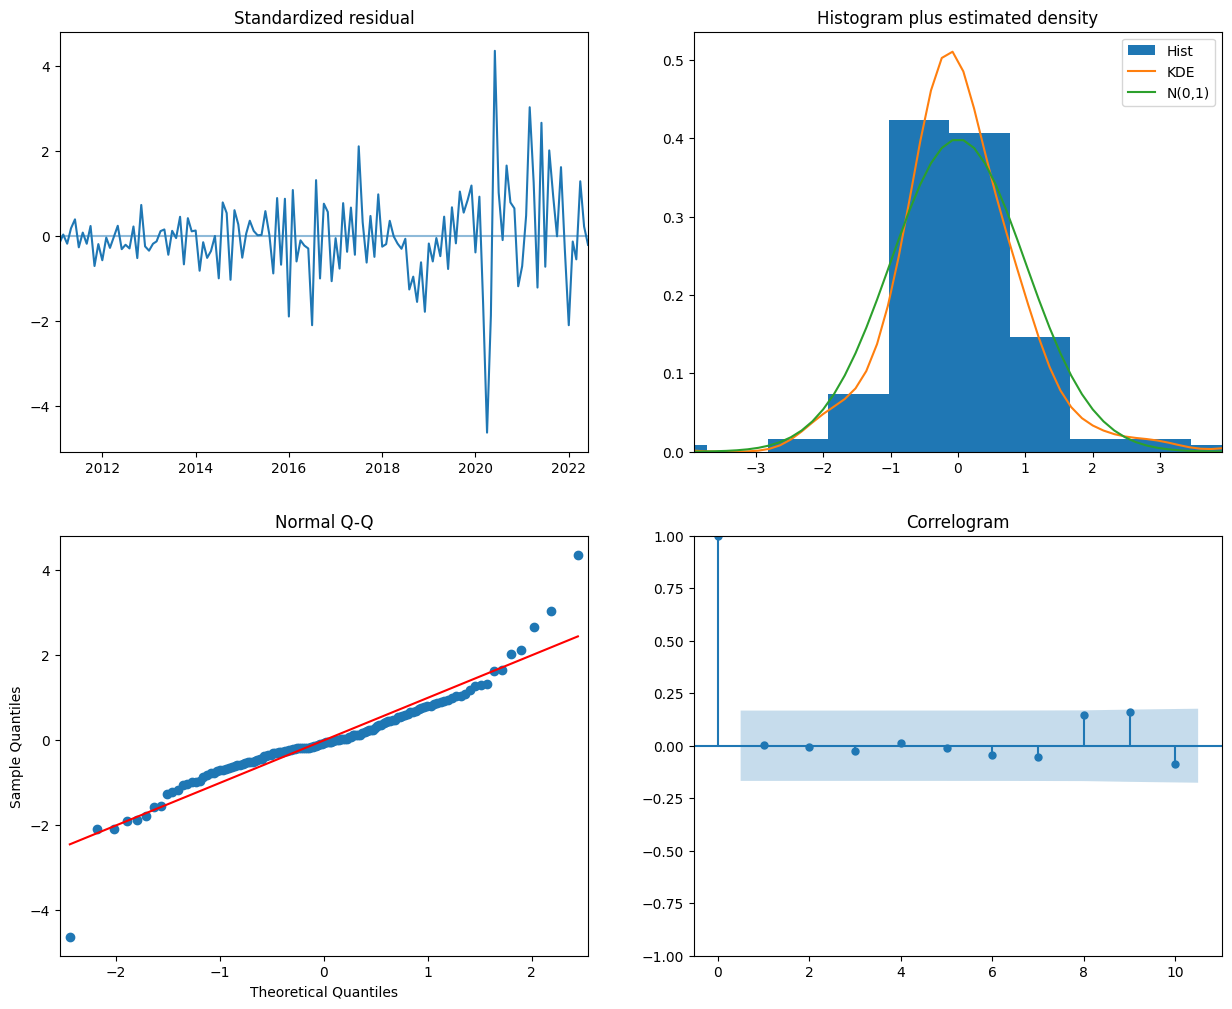

In [ ]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

> Standarized Resual

Herhangi bir düzen yok, oldukça güzel gözüküyor.

> KDE

KDE normal dağıtımla oldukça benzer.

> Normal Q-Q

Genel olarak veriler çizgi üzerinde

> Correlogram

Sıfırdan büyük laglarda korealasyonun %95i anlamsız, istenilen aralıkta.

In [ ]:
#predictions
predictions = SARIMA_model.predict(len(test))
predictions = pd.Series(predictions, index=test.index)
residuals = test["Endeks"] - predictions

In [ ]:
predictions

datetime
2022-07-01    144.575780
2022-08-01    147.855833
2022-09-01    150.034023
2022-10-01    146.525442
2022-11-01    147.569208
2022-12-01    161.901361
2023-01-01    121.894390
2023-02-01    122.894700
2023-03-01    138.282794
2023-04-01    137.510433
2023-05-01    140.895397
dtype: float64

In [ ]:
residuals

datetime
2022-07-01    -3.175780
2022-08-01     9.644167
2022-09-01    12.065977
2022-10-01    12.474558
2022-11-01    14.830792
2022-12-01    26.498639
2023-01-01    24.605610
2023-02-01    12.405300
2023-03-01    30.917206
2023-04-01    28.289567
2023-05-01    37.204603
dtype: float64

Text(0, 0.5, 'Endeks')

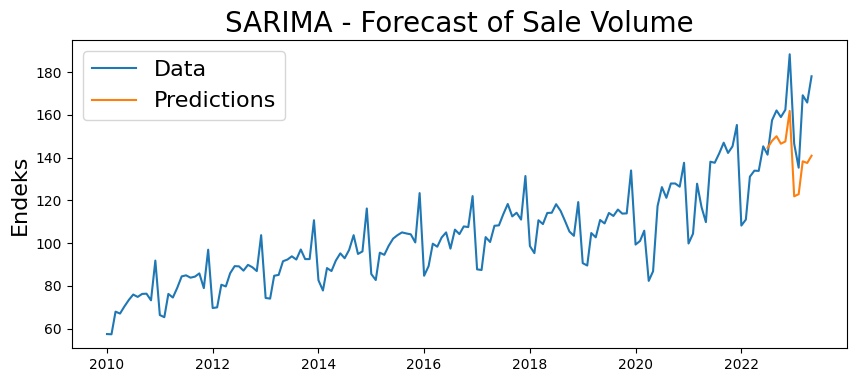

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(pt_arindirilmamis["Endeks"])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('SARIMA - Forecast of Sale Volume', fontsize=20)
plt.ylabel('Endeks', fontsize=16);

2023'te endeksin yukarı yönlü hareketi modelimiz tarafından iyi öngörülememiştir. Bu nedenle 'Rolling Origin' yöntemi kullanılacaktır.

In [ ]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test["Endeks"])),4))

Mean Absolute Percent Error: 0.1173


In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 21.796812653971394


## Rolling Forecast Origin

Yeni bir model eğitimi

In [ ]:
SARIMA_model

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(2, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
# Auto-arima'nın ilk modelde kullandığı parametrelerimiz
my_order = (1,1,2)
my_seasonal_order = (2, 1, 1, 12)

In [ ]:
test["Endeks"].index

DatetimeIndex(['2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01'],
              dtype='datetime64[ns]', name='datetime', freq=None)

In [ ]:
# Model eğitimi
rolling_predictions = test["Endeks"].copy()
for train_end in test["Endeks"].index:
    train_data = pt_arindirilmamis[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data["Endeks"], order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [ ]:
rolling_predictions

datetime
2022-07-01    144.575780
2022-08-01    145.339391
2022-09-01    158.294348
2022-10-01    154.299194
2022-11-01    157.084227
2022-12-01    172.952449
2023-01-01    143.042680
2023-02-01    142.052219
2023-03-01    148.478535
2023-04-01    166.340557
2023-05-01    163.361674
Name: Endeks, dtype: float64

In [ ]:
rolling_residuals = test["Endeks"] - rolling_predictions

Text(0, 0.5, 'Error')

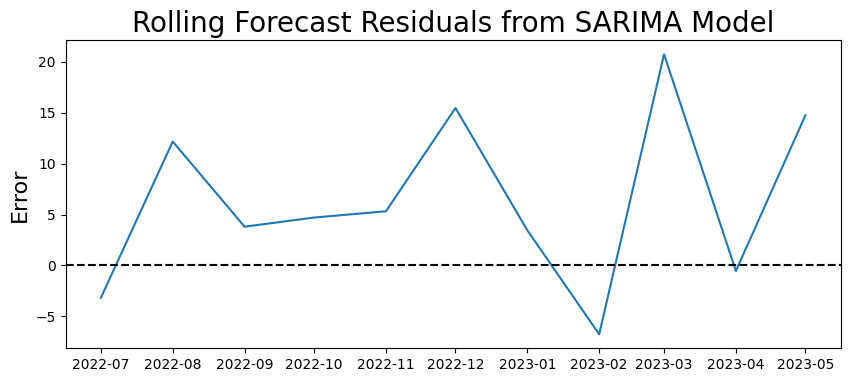

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

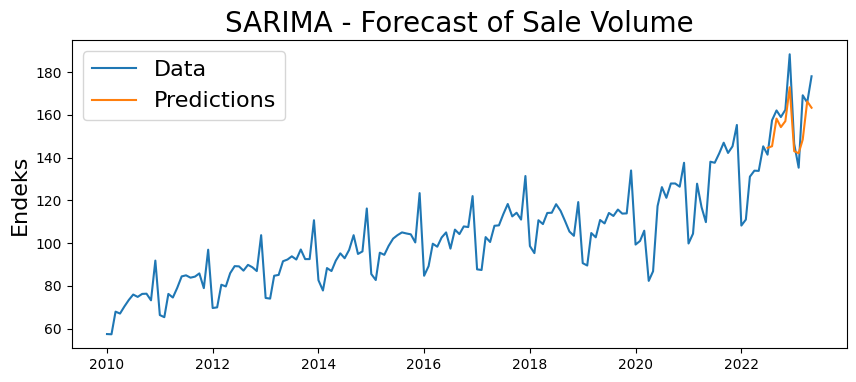

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(pt_arindirilmamis["Endeks"])
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('SARIMA - Forecast of Sale Volume', fontsize=20)
plt.ylabel('Endeks', fontsize=16);

### Sonuç

Yukarıda da görüldüğü üzere ' Rolling Origin ' yöntemiyle çok daha doğru bir tahmin elde edilmiştir.

In [ ]:
print('Eski Mean Absolute Percent Error:', round(np.mean(abs(residuals/test["Endeks"])),4))

Mean Absolute Percent Error: 0.1173


In [ ]:
print('Yeni Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test["Endeks"])),4))

Yeni Mean Absolute Percent Error: 0.0499


In [ ]:
print('Eski Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Eski Root Mean Squared Error: 21.796812653971394


In [ ]:
print('Yeni Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Yeni Root Mean Squared Error: 10.295038194614865
